#### imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import linregress
import datetime

---

### data

link to raw data: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

In [5]:
df_companies = pd.read_csv(r'sp500_companies.csv')
df_index = pd.read_csv(r'sp500_index.csv')
df_stocks = pd.read_csv(r'sp500_stocks.csv')

---

In [6]:
df_companies.head()[:2]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350


In [ ]:
# df_companies['Symbol']

In [7]:
symbol_name = dict()
for sym, name in zip(df_companies.Symbol, df_companies.Shortname):
    symbol_name[sym] = name


In [8]:
#symbol_name

In [9]:
df_index[:5]

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [10]:
df_index.dtypes

Date       object
S&P500    float64
dtype: object

In [11]:
#plt.plot(df_index.Date[:20], df_index['S&P500'][:20])

In [12]:
type(df_index.Date)
print(df_index['Date'].iloc[0])

2014-12-22


In [13]:
df_index[:5]

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [14]:
df_index.Date.iloc[0]

'2014-12-22'

In [15]:
df_index['date'] = pd.to_datetime(df_index.Date) # creating a new column called "date" that is in pandas datetime format

In [16]:
df_index.drop(columns = 'Date', inplace = True) # dropping the Date column

In [17]:
df_index

,S&P500,date
0,2078.54,2014-12-22
1,2082.17,2014-12-23
2,2081.88,2014-12-24
3,2088.77,2014-12-26
4,2090.57,2014-12-29
...,...,...
2512,6074.08,2024-12-16
2513,6050.61,2024-12-17
2514,5872.16,2024-12-18
2515,5867.08,2024-12-19


In [18]:
df_index.date.iloc[0]

Timestamp('2014-12-22 00:00:00')

In [19]:
df_index.date.iloc[0].toordinal()

735589

In [20]:
df_index['date_greg'] = df_index.date.apply(lambda x: x.toordinal())

In [21]:
df_index.date

0      2014-12-22
1      2014-12-23
2      2014-12-24
3      2014-12-26
4      2014-12-29
          ...    
2512   2024-12-16
2513   2024-12-17
2514   2024-12-18
2515   2024-12-19
2516   2024-12-20
Name: date, Length: 2517, dtype: datetime64[ns]

In [22]:
df_index.date_greg

0       735589
1       735590
2       735591
3       735593
4       735596
         ...  
2512    739236
2513    739237
2514    739238
2515    739239
2516    739240
Name: date_greg, Length: 2517, dtype: int64

In [23]:
result = linregress(df_index.date_greg, df_index['S&P500'])

In [24]:
result

LinregressResult(slope=np.float64(0.9708854676606512), intercept=np.float64(-712599.502687987), rvalue=np.float64(0.9497205126317765), pvalue=np.float64(0.0), stderr=np.float64(0.006382411310402554), intercept_stderr=np.float64(4706.492930631322))

In [25]:
# simple linear model y = mx + b

m = result.slope
b = result.intercept

In [26]:
df_index['lob'] = df_index.date_greg.apply(lambda x: m*x + b)

In [27]:
df_index

,S&P500,date,date_greg,lob
0,2078.54,2014-12-22,735589,1573.167583
1,2082.17,2014-12-23,735590,1574.138469
2,2081.88,2014-12-24,735591,1575.109354
3,2088.77,2014-12-26,735593,1577.051125
4,2090.57,2014-12-29,735596,1579.963781
...,...,...,...,...
2512,6074.08,2024-12-16,739236,5113.986884
2513,6050.61,2024-12-17,739237,5114.957769
2514,5872.16,2024-12-18,739238,5115.928655
2515,5867.08,2024-12-19,739239,5116.899540


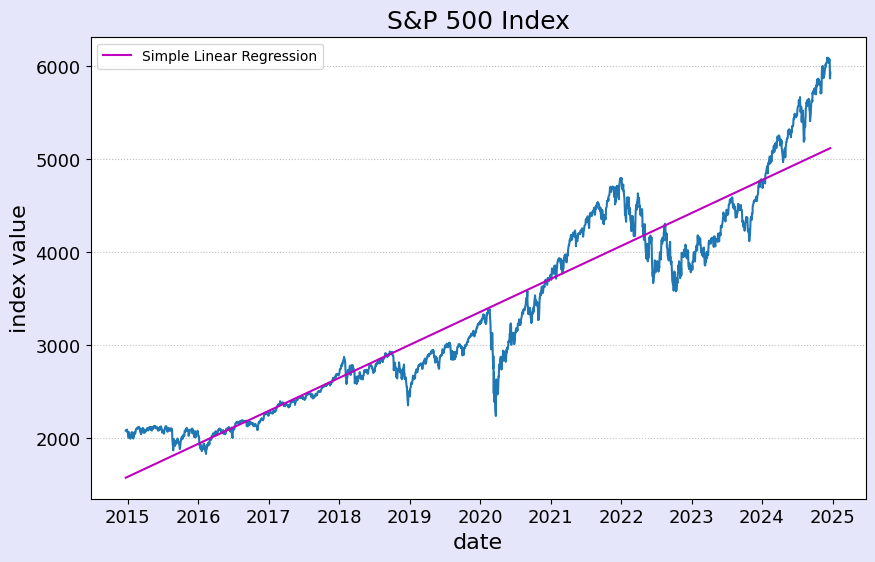

In [28]:
fig, ax= plt.subplots(figsize = (10,6))

sns.lineplot(data = df_index,
            x = 'date',
            y = 'S&P500'
            )
plt.plot(df_index.date,
        df_index.lob,
         color = 'm',
        label = 'Simple Linear Regression'
        )
plt.legend()
plt.xlabel('date', fontsize = 16)
plt.ylabel('index value', fontsize = 16)
plt.title('S&P 500 Index', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=13)
ax.set_aspect('auto')
fig.patch.set_facecolor('lavender')
plt.grid(axis = 'y', alpha = .8, ls = ":")

In [ ]:
len(df_stocks)

In [29]:
df_stocks[:3]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_stocks.dropna()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0
...,...,...,...,...,...,...,...,...
1876459,2024-12-16,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0
1876460,2024-12-17,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0
1876461,2024-12-18,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0
1876462,2024-12-19,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0


In [31]:
df_stocks.dropna(subset = ['Open'])

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0
...,...,...,...,...,...,...,...,...
1876459,2024-12-16,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0
1876460,2024-12-17,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0
1876461,2024-12-18,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0
1876462,2024-12-19,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0


In [32]:
df_stocks['date'] = pd.to_datetime(df_stocks.Date)
df_stocks['date_greg'] = df_stocks.date.apply(lambda x: x.toordinal())

In [33]:
#df_index

### merge all dfs together

In [34]:
df_stocks[:2]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-05,733777


In [35]:
df_stocks.dropna()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,2010-01-04,733776
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,2010-01-05,733777
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,2010-01-06,733778
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,2010-01-07,733779
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,2010-01-08,733780
...,...,...,...,...,...,...,...,...,...,...
1876459,2024-12-16,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0,2024-12-16,739236
1876460,2024-12-17,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0,2024-12-17,739237
1876461,2024-12-18,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0,2024-12-18,739238
1876462,2024-12-19,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0,2024-12-19,739239


In [36]:
df_companies[:2]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350


In [37]:
columns_to_keep = ['Symbol', 'Longname', 'Sector', 'Industry', 'Weight']

In [38]:
df_companies.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [39]:
merge_1_df = df_stocks.merge(df_companies, on = 'Symbol', how = 'left')

In [40]:
merge_1_df[:1]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267


In [41]:
df_index.drop(columns = 'date_greg', inplace = True)

In [42]:
all_df = merge_1_df.merge(df_index, how = 'left', on = 'date').copy()

In [43]:
all_df = (df_stocks.merge(df_companies, on = 'Symbol', how = 'left').
          reset_index(drop = True).
          drop(columns = {'Date'}).
          merge(df_index, how = 'left', on = 'date')
         )

In [44]:
all_df.columns

Index(['Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'date',
       'date_greg', 'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'S&P500', 'lob'],
      dtype='object')

In [45]:
# feature selection

columns_to_drop = [
    'Symbol','Longname', 'Exchange', 'Sector', 'Industry',
    'Currentprice', 'Marketcap', 'Ebitda', 
    'Revenuegrowth', 'City', 'State', 
    #'date',
    'Country', 'Fulltimeemployees', 
    'Longbusinesssummary', 
    'Weight', 'lob', 
    'Close'
        ]

columns_to_keep = [i for i in all_df.columns if i not in columns_to_drop]

In [46]:
dropped_cols = all_df[columns_to_keep].copy()

In [47]:
dropped_cols.dropna(inplace = True)

In [48]:
dropped_cols.rename(columns= {'Adj Close': 'close',
                             'Open': 'open',
                             'Shortname': 'name',
                             'S&P500': 'sp500'
                             }, inplace = True)

In [49]:
dropped_cols.head()

,close,High,Low,open,Volume,date,date_greg,name,sp500
5019,23.673809,27.684999,27.200001,27.309999,852600.0,2014-12-22,735589,A.O. Smith Corporation,2078.54
5020,23.960384,28.145000,27.590000,27.795000,973400.0,2014-12-23,735590,A.O. Smith Corporation,2082.17
5021,24.033092,28.209999,27.900000,27.900000,233600.0,2014-12-24,735591,A.O. Smith Corporation,2081.88
5022,24.217010,28.455000,28.170000,28.250000,360000.0,2014-12-26,735593,A.O. Smith Corporation,2088.77
5023,24.238392,28.490000,28.195000,28.299999,391800.0,2014-12-29,735596,A.O. Smith Corporation,2090.57


In [50]:
dropped_cols.close.shift(0)

5019        23.673809
5020        23.960384
5021        24.033092
5022        24.217010
5023        24.238392
              ...    
1876459    120.779999
1876460    120.769997
1876461    116.919998
1876462    116.430000
1876463    117.139999
Name: close, Length: 423337, dtype: float64

In [51]:



dropped_cols['day_pct_change'] = (dropped_cols.sp500 - dropped_cols.open) / dropped_cols.open

In [52]:
new_dfs_list = list()

for c, df in dropped_cols.groupby('name'):
    
    # getting the pct change from one trading day to the next
    
    df['prev_day_close'] = df.close.shift(1)
    df['day_pct_change'] = (df.close - df.prev_day_close) / df.prev_day_close * 100
    
    df['week_mean_change'] = df.day_pct_change.rolling(5).mean() # assuming 5 tradining days a week
    df['month_mean_change'] = df.day_pct_change.rolling(21).mean() # assuming 21 trading days a month
    df['annual_mean_change'] = df.day_pct_change.rolling(252).mean()  # assuming 252 trading days in a given year
    
    
    df['week_sd_change'] = df.day_pct_change.rolling(5).std(ddof=1) # assuming 5 tradining days a month
    df['month_sd_change'] = df.day_pct_change.rolling(21).std(ddof=1) # assuming 21 trading days a month
    df['annual_sd_change'] = df.day_pct_change.rolling(252).std(ddof=1)  # assuming 252 trading days in a given year
    
    ##################################################################################################################
    
    
    
    df['target_weekly_sd'] = df.week_sd_change.shift(21) # our target is to predict the weekly volatility a month in advance.
    
    ########################################################################################################################
    
    
    new_dfs_list.append(df)
    
new_cols = pd.concat(new_dfs_list)
    
    

In [53]:
df['sp500'] = df.close.shift(1)
df['day_pct_change'] = (df.close - df.prev_day_close) / df.prev_day_close * 100

df['week_mean_change'] = df.day_pct_change.rolling(5).mean() # assuming 5 tradining days a month
df['month_mean_change'] = df.day_pct_change.rolling(21).mean() # assuming 21 trading days a month
df['annual_mean_change'] = df.day_pct_change.rolling(252).mean()  # assuming 252 trading days in a given year


df['week_sd_change'] = df.day_pct_change.rolling(5).std(ddof=1) # assuming 5 tradining days a month
df['month_sd_change'] = df.day_pct_change.rolling(21).std(ddof=1) # assuming 21 trading days a month
df['annual_sd_change'] = df.day_pct_change.rolling(252).std(ddof=1)  # assuming 252 trading days in a given year

##################################################################################################################


df['target_weekly_sd'] = df.week_sd_change.shift(21)

In [55]:
new_cols[-5:]

,close,High,Low,open,Volume,date,date_greg,name,sp500,day_pct_change,prev_day_close,week_mean_change,month_mean_change,annual_mean_change,week_sd_change,month_sd_change,annual_sd_change,target_weekly_sd
1876459,120.779999,122.570000,120.000000,120.720001,1515900.0,2024-12-16,739236,Xylem Inc.,6074.08,0.149254,120.599998,-1.350190,-0.008593,0.047230,1.674964,1.544757,1.347557,0.929694
1876460,120.769997,121.760002,119.730003,119.730003,2009200.0,2024-12-17,739237,Xylem Inc.,6050.61,-0.008281,120.779999,-1.231243,-0.014860,0.047948,1.760236,1.544462,1.347479,0.837761
1876461,116.919998,121.559998,116.879997,120.790001,1638500.0,2024-12-18,739238,Xylem Inc.,5872.16,-3.187877,120.769997,-1.061475,-0.193254,0.035334,1.432422,1.684909,1.362806,0.914129
1876462,116.430000,118.919998,116.129997,117.440002,1708000.0,2024-12-19,739239,Xylem Inc.,5867.08,-0.419088,116.919998,-0.770840,-0.204267,0.030553,1.372978,1.685627,1.362276,0.883414
1876463,117.139999,118.120003,115.900002,116.070000,2799600.0,2024-12-20,739240,Xylem Inc.,5930.85,0.609808,116.430000,-0.571237,-0.198214,0.039765,1.508380,1.688443,1.358291,0.918158


In [56]:
one_c = new_cols[new_cols.name == new_cols.name.unique()[1]]

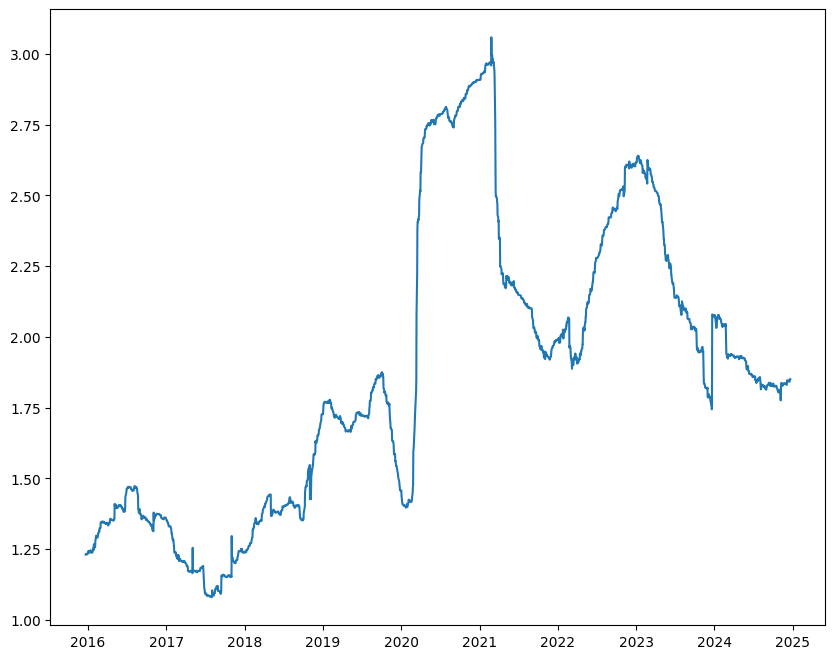

In [57]:
fig, ax = plt.subplots(figsize = (10,8))

plt.plot(one_c.date, one_c.annual_sd_change)

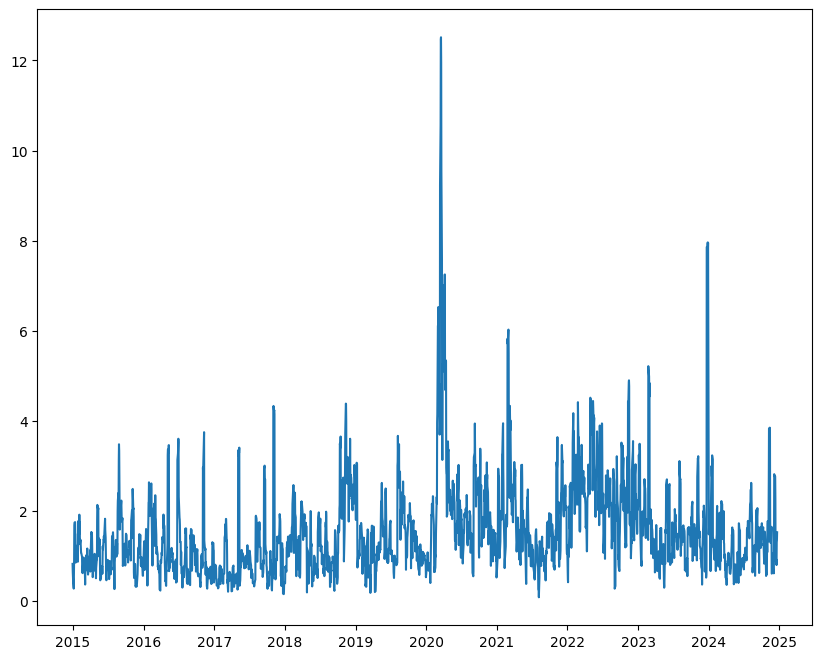

In [58]:
fig, ax = plt.subplots(figsize = (10,8))

plt.plot(one_c.date, one_c.week_sd_change)

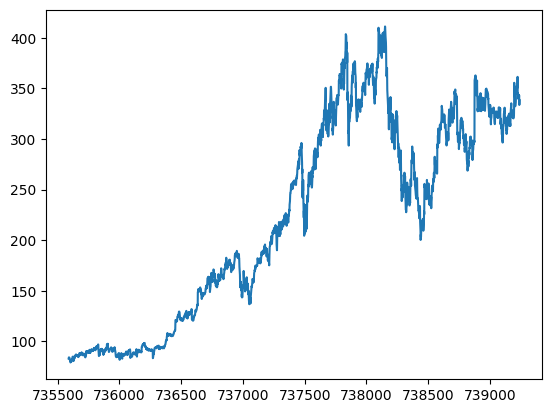

In [59]:
plt.plot(one_c.date_greg, one_c.close)

In [60]:
plt.plot(one_c.date_greg, one_c.Close)

AttributeError: 'DataFrame' object has no attribute 'Close'

In [ ]:
all_df.Sector

In [ ]:
for sym, df in all_df.groupby('Symbol'):
    #print(sym)
    sd = df['Close'].std()
    mean = df['Close'].mean()

    upper_limit = mean + 3*sd

    lower_limit = mean - 3 * sd
    
    outliers = df[(df['Close'] < lower_limit) |
                  (df['Close'] > upper_limit)].copy()
    
    if len(outliers) > 0:
        print('this company has outliers ', sym)

In [63]:
one_symbol = all_df[all_df.Symbol == 'AOS'].copy()

In [64]:
one_symbol['pct_close'] = (one_symbol['Close'] - one_symbol['Close'].iloc[0]) / one_symbol['Close'].iloc[0] *100

In [65]:


one_symbol.pct_close

3768      0.000000
3769     -1.277738
3770     -1.232914
3771     -0.941495
3772      0.515574
           ...    
7531    866.913247
7532    852.387332
7533    826.832605
7534    820.511136
7535    824.277091
Name: pct_close, Length: 3768, dtype: float64

In [67]:
one_symbol.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg,Exchange,...,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,lob,pct_close
3768,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,2010-01-04,733776,NYQ,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN,NaN,0.000000
3769,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,2010-01-05,733777,NYQ,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN,NaN,-1.277738
3770,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,2010-01-06,733778,NYQ,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN,NaN,-1.232914
3771,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,2010-01-07,733779,NYQ,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN,NaN,-0.941495
3772,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,2010-01-08,733780,NYQ,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,NaN,NaN,0.515574


<Axes: xlabel='date', ylabel='Close'>

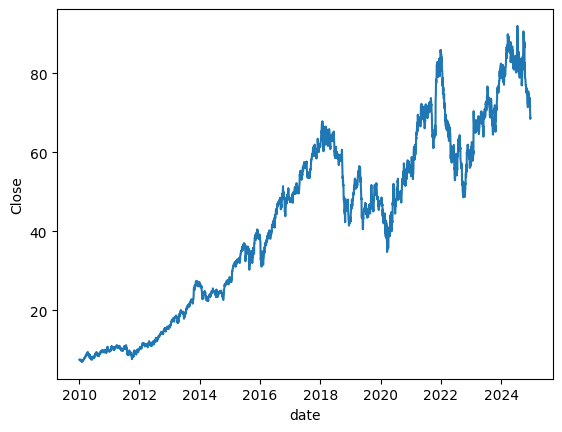

In [68]:
sns.lineplot(data = one_symbol,
            x = 'date',
            y = 'Close')

<Axes: xlabel='date', ylabel='pct_close'>

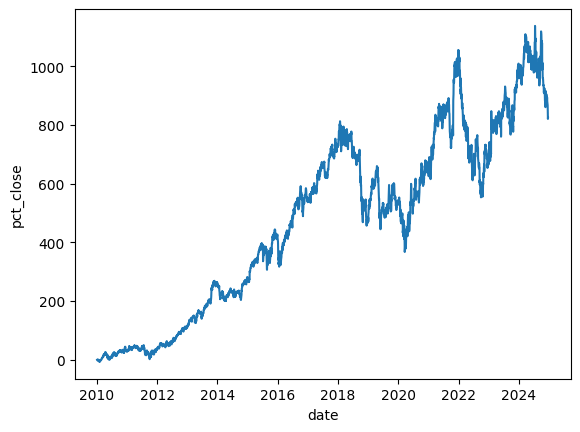

In [69]:
sns.lineplot(data = one_symbol,
            x = 'date',
            y = 'pct_close')

In [72]:
sd = one_symbol['Close'].std()
mean = one_symbol['Close'].mean()

upper_limit = mean + 3*sd

lower_limit = mean - 3 * sd

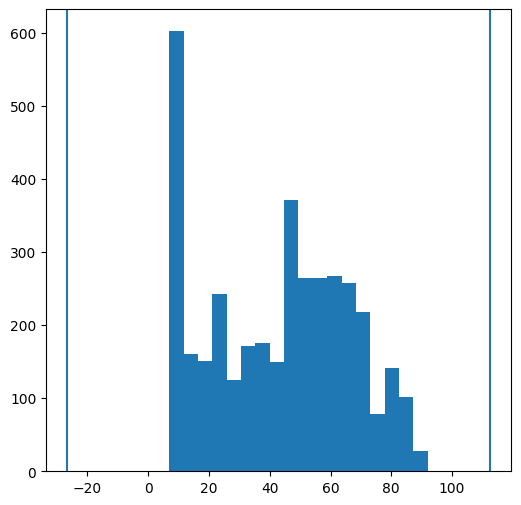

In [73]:
fig, ax = plt.subplots(figsize = (6,6))

plt.hist(one_symbol['Close'], bins = 'auto')
ax.axvline(x = upper_limit)
ax.axvline(x = lower_limit)


In [74]:
all_df.drop_duplicates(subset = ['date', 'Symbol'], inplace = True)

In [78]:
ranked_stocks = list()

for day, df in df_stocks.groupby('date'):
    df.sort_values(by = 'Adj Close', 
                   ascending = False,
                   inplace = True
                  )
    df.reset_index(inplace = True)
    df['rank'] = df.index + 1
    
    ranked_stocks.append(df)
    
ranked_df = pd.concat(ranked_stocks)

In [79]:
ranked_df['name'] = ranked_df.Symbol.apply(lambda x: symbol_name[x])

In [80]:
#symbol_name

In [81]:
ranked_df[ranked_df.name.str.contains('Alph')]

,index,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg,rank,name
92,75360,2010-01-04,GOOG,15.554352,15.610239,15.678981,15.547723,15.615220,78541293.0,2010-01-04,733776,93,Alphabet Inc.
164,71592,2010-01-04,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776,165,Alphabet Inc.
93,75361,2010-01-05,GOOG,15.485854,15.541497,15.637387,15.480475,15.620949,120638494.0,2010-01-05,733777,94,Alphabet Inc.
164,71593,2010-01-05,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-05,733777,165,Alphabet Inc.
96,75362,2010-01-06,GOOG,15.095475,15.149715,15.588072,15.102393,15.588072,159744526.0,2010-01-06,733778,97,Alphabet Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,75357,2024-12-18,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-18,739238,185,Alphabet Inc.
48,79126,2024-12-19,GOOG,189.699997,189.699997,194.600006,189.520004,193.279999,26981200.0,2024-12-19,739239,49,Alphabet Inc.
184,75358,2024-12-19,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-19,739239,185,Alphabet Inc.
47,79127,2024-12-20,GOOG,192.960007,192.960007,194.134995,186.369995,187.009995,45260900.0,2024-12-20,739240,48,Alphabet Inc.


In [82]:
top_5 = ranked_df[ranked_df['rank'] <=5].copy()

In [83]:
sorted(top_5.name.unique())

['ANSYS, Inc.',
 'Becton, Dickinson and Company',
 'Caterpillar, Inc.',
 'Constellation Brands, Inc.',
 'Deere & Company',
 "Domino's Pizza Inc",
 'Equinix, Inc.',
 'Essex Property Trust, Inc.',
 'F5, Inc.',
 'FactSet Research Systems Inc.',
 'FedEx Corporation',
 'First Solar, Inc.',
 'Huntington Ingalls Industries, ',
 'Labcorp Holdings Inc.',
 'Meta Platforms, Inc.',
 'Mettler-Toledo International, I',
 'Netflix, Inc.',
 'Parker-Hannifin Corporation',
 'Transdigm Group Incorporated',
 'Vertex Pharmaceuticals Incorpor',
 'West Pharmaceutical Services, I',
 'Willis Towers Watson Public Lim']

In [84]:
one_day = df_stocks[df_stocks.date == df_stocks.date.min()].copy()

In [85]:
one_day.sort_values(by = 'Adj Close', ascending = False)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg
734760,2010-01-04,FSLR,135.460007,135.460007,136.830002,133.570007,136.000000,1636000.0,2010-01-04,733776
1179384,2010-01-04,MTD,105.639999,105.639999,106.209999,104.830002,105.480003,95100.0,2010-01-04,733776
655632,2010-01-04,EQIX,83.680046,109.559998,109.620003,106.510002,106.519997,576300.0,2010-01-04,733776
723456,2010-01-04,FDX,70.709023,83.449997,85.000000,83.110001,84.209999,3215100.0,2010-01-04,733776
1062576,2010-01-04,LH,63.371464,65.609962,65.721649,64.286942,64.836769,1028278.0,2010-01-04,733776
...,...,...,...,...,...,...,...,...,...,...
1872696,2010-01-04,XYL,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776
1876464,2010-01-04,YUM,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776
1880232,2010-01-04,ZBRA,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776
1884000,2010-01-04,ZBH,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04,733776


In [86]:
drop_na_stocks = df_stocks.dropna().copy() # this will drop any column with an na. This is likely too much cleaning, but just to understand this a little better

In [87]:
len(drop_na_stocks.Symbol.unique())

172

In [88]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load stock data (Ensure df_stocks is available)
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks = df_stocks.sort_values(by=['Symbol', 'Date'])

# Compute log returns
df_stocks['Log_Return'] = np.log(df_stocks['Close'] / df_stocks['Close'].shift(1))

# Compute rolling volatility (20-day standard deviation of log returns)
df_stocks['Volatility'] = df_stocks.groupby('Symbol')['Log_Return'].rolling(window=20).std().reset_index(0, drop=True)

# Drop NaN values resulting from rolling calculations
df_stocks = df_stocks.dropna()

df_stocks.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg,Log_Return,Volatility
12078,2013-01-31,ABBV,22.865091,36.689999,36.930000,36.270000,36.840000,10720700.0,2013-01-31,734899,-0.006520,0.017137
12079,2013-02-01,ABBV,23.170454,37.180000,37.200001,36.520000,36.840000,9527500.0,2013-02-01,734900,0.013267,0.017121
12080,2013-02-04,ABBV,23.232775,37.279999,37.299999,36.549999,36.639999,6348000.0,2013-02-04,734903,0.002686,0.016706
12081,2013-02-05,ABBV,23.182917,37.200001,37.730000,37.180000,37.419998,7284400.0,2013-02-05,734904,-0.002148,0.016758
12082,2013-02-06,ABBV,23.145525,37.139999,37.279999,36.860001,36.959999,5738900.0,2013-02-06,734905,-0.001614,0.015690


In [102]:
# Calculate the average volatility for each stock
avg_volatility = df_stocks.groupby('Symbol')['Volatility'].mean().sort_values(ascending=False)

# Print out the top 10 stocks with the highest average volatility
print("Stocks with the highest average volatility:")
print(avg_volatility.head(10))

Stocks with the highest average volatility:
Symbol
ENPH    0.046940
TSLA    0.033083
FSLR    0.030930
BLDR    0.030699
UBER    0.030265
FCX     0.027994
AXON    0.027986
NFLX    0.027876
DXCM    0.027390
UAL     0.026638
Name: Volatility, dtype: float64


In [89]:

# Create additional features
df_stocks['Rolling_Mean_10'] = df_stocks.groupby('Symbol')['Close'].transform(lambda x: x.rolling(10).mean())
df_stocks['Rolling_Std_10'] = df_stocks.groupby('Symbol')['Close'].transform(lambda x: x.rolling(10).std())
df_stocks['Momentum'] = df_stocks.groupby('Symbol')['Close'].diff(5)
df_stocks['Volume_Change'] = df_stocks.groupby('Symbol')['Volume'].pct_change()

# Drop NaN values again
df_stocks = df_stocks.dropna()

df_stocks.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,date_greg,Log_Return,Volatility,Rolling_Mean_10,Rolling_Std_10,Momentum,Volume_Change
12087,2013-02-13,ABBV,21.980150,35.270000,35.570000,35.150002,35.419998,4859800.0,2013-02-13,734912,-0.004244,0.016999,36.469999,0.757789,-1.869999,-0.349755
12088,2013-02-14,ABBV,22.790304,36.570000,36.730000,35.009998,35.049999,7570100.0,2013-02-14,734913,0.036195,0.017858,36.457999,0.754863,0.150002,0.557698
12089,2013-02-15,ABBV,23.419737,37.580002,37.810001,36.930000,36.930000,13296300.0,2013-02-15,734914,0.027244,0.018057,36.498000,0.806224,1.330002,0.756423
12090,2013-02-19,ABBV,23.799885,38.189999,38.330002,37.110001,37.540001,8292700.0,2013-02-19,734918,0.016102,0.017593,36.589000,0.943898,2.340000,-0.376315
12091,2013-02-20,ABBV,24.061625,38.610001,39.130001,37.610001,38.160000,8096400.0,2013-02-20,734919,0.010938,0.016640,36.730000,1.131901,3.190002,-0.023671


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a copy of the original dataframe to avoid warnings
df_stocks = df_stocks.copy()

# ----- Feature Engineering FIRST -----
# Create lagged features and technical indicators with inf handling
df_stocks['Volume_Change'] = df_stocks['Volume'].pct_change()
df_stocks['Volume_Change'] = df_stocks['Volume_Change'].replace([np.inf, -np.inf], np.nan)  # Handle infs
df_stocks['Close_Lag_1'] = df_stocks['Close'].shift(1)
df_stocks['Rolling_Mean_10'] = df_stocks['Close'].rolling(10).mean()
df_stocks['Rolling_Std_10'] = df_stocks['Close'].rolling(10).std()
df_stocks['Momentum'] = df_stocks['Close'].diff(5)

# Remove constant features (if any)
features = ['Rolling_Mean_10', 'Rolling_Std_10', 'Momentum', 'Volume_Change']
constant_features = [col for col in features if df_stocks[col].nunique() == 1]
print("Constant features:", constant_features)
features = [col for col in features if col not in constant_features] 

# Clean data after feature creation (drops NaNs introduced by shifts/rolling windows)
df_stocks = df_stocks.dropna()

# ----- THEN Define Features/Target -----
target = 'Close'

# ----- Temporal Split -----
split_index = int(len(df_stocks) * 0.8)
train = df_stocks.iloc[:split_index]
test = df_stocks.iloc[split_index:]

# ----- Data Preparation -----
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Handle infinities and missing values (redundant safety check)
train_mean = X_train.mean()
train_std = X_train.std()

X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(train_mean)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(train_mean)

# Standard scaling
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

# Clip extreme values
X_train = np.clip(X_train, -3, 3)
X_test = np.clip(X_test, -3, 3)

# ----- Model Setup -----
tscv = TimeSeriesSplit(n_splits=5)
models = {
    'RandomForest': RandomForestRegressor(n_estimators=200, 
                                        max_depth=8,
                                        random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200,
             learning_rate=0.05,
             max_depth=5,
             random_state=42,
             early_stopping_rounds=20,  
             eval_metric='rmse')
}

# ... [Previous code remains unchanged until the training loop]

# ----- Training & Evaluation -----
for name, model in models.items():
    print(f"\nTraining {name}...")
    if name == 'XGBoost':
        # Split training data into train and validation sets (temporal split)
        val_size = int(len(X_train) * 0.2)
        X_train_sub, X_val = X_train.iloc[:-val_size], X_train.iloc[-val_size:]
        y_train_sub, y_val = y_train.iloc[:-val_size], y_train.iloc[-val_size:]
        
        model.fit(X_train_sub, y_train_sub,
                  eval_set=[(X_val, y_val)],
                  verbose=False)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

# ... [Remaining code remains unchanged]

# ----- Feature Importance -----
print("\nFeature Importances:")
for name, model in models.items():
    importance = pd.Series(model.feature_importances_, index=features)
    print(f"\n{name}:")
    print(importance.sort_values(ascending=False))

Constant features: []

Training RandomForest...
RandomForest Performance:
RMSE: 30.1034
MAE: 4.0899
R²: 0.9161

Training XGBoost...
XGBoost Performance:
RMSE: 35.1812
MAE: 11.8639
R²: 0.8854

Feature Importances:

RandomForest:
Rolling_Mean_10    0.940310
Rolling_Std_10     0.051380
Volume_Change      0.004402
Momentum           0.003908
dtype: float64

XGBoost:
Rolling_Mean_10    0.822123
Rolling_Std_10     0.167279
Volume_Change      0.006555
Momentum           0.004042
dtype: float32


In [101]:


predictions = {}  # Dictionary to store prediction DataFrames for each model

for name, model in models.items():
    print(f"\nTraining {name}...")
    if name == 'XGBoost':
        # For XGBoost, perform an internal temporal split for early stopping
        val_size = int(len(X_train) * 0.2)
        X_train_sub, X_val = X_train.iloc[:-val_size], X_train.iloc[-val_size:]
        y_train_sub, y_val = y_train.iloc[:-val_size], y_train.iloc[-val_size:]
        model.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)], verbose=False)
    else:
        model.fit(X_train, y_train)
    
    # Generate predictions on the test set
    y_pred = model.predict(X_test)
    
    # Create a DataFrame with test data (assuming test contains columns 'Symbol' and 'date')
    test_results = test.copy()
    test_results['Predicted_Close'] = y_pred
    
    # Store predictions in dictionary
    predictions[name] = test_results[['Symbol', 'date', 'Close', 'Predicted_Close']]
    
    print(f"\nPredictions from {name}:")
    print(predictions[name].head(10))



Training RandomForest...

Predictions from RandomForest:
        Symbol       date      Close  Predicted_Close
1481782    RTX 2013-10-23  66.954056        67.071151
1481783    RTX 2013-10-24  67.375710        66.989966
1481784    RTX 2013-10-25  67.665199        67.130028
1481785    RTX 2013-10-28  66.702332        66.953460
1481786    RTX 2013-10-29  66.972939        67.307858
1481787    RTX 2013-10-30  66.677155        67.004807
1481788    RTX 2013-10-31  66.865952        66.954673
1481789    RTX 2013-11-01  67.658905        67.058726
1481790    RTX 2013-11-04  67.954689        67.340666
1481791    RTX 2013-11-05  67.765892        67.365181

Training XGBoost...

Predictions from XGBoost:
        Symbol       date      Close  Predicted_Close
1481782    RTX 2013-10-23  66.954056        70.787346
1481783    RTX 2013-10-24  67.375710        70.787346
1481784    RTX 2013-10-25  67.665199        70.787346
1481785    RTX 2013-10-28  66.702332        70.787346
1481786    RTX 2013-10-29  66.